In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
input_size=1
hidden_size=32
num_layers=2
output_size=1
rnn=nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers,
           nonlinearity='relu', batch_first=True)
fc=nn.Linear(hidden_size,output_size)
print(rnn, fc, sep="\n")
print("RNN:")
for p in rnn.parameters():
    print(p.shape)
    
print("FC:")
for p in fc.parameters():
    print(p.shape)

RNN(1, 32, num_layers=2, batch_first=True)
Linear(in_features=32, out_features=1, bias=True)
RNN:
torch.Size([32, 1])
torch.Size([32, 32])
torch.Size([32])
torch.Size([32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([32])
torch.Size([32])
FC:
torch.Size([1, 32])
torch.Size([1])


In [3]:
import itertools
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(itertools.chain(rnn.parameters(), fc.parameters()), 0.01)

Loss: 0.010057717561721802


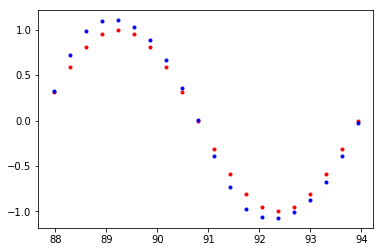

Loss: 0.0036980758886784315


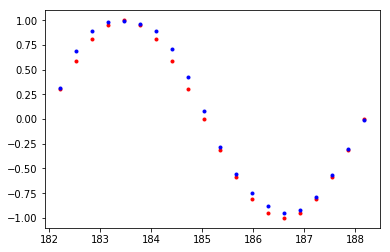

Loss: 0.00023732830595690757


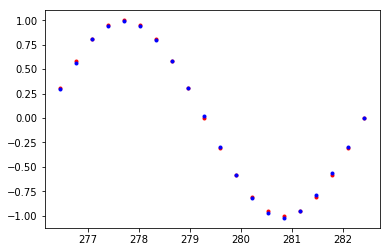

Loss: 0.0001329024089500308


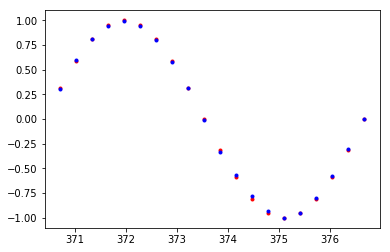

Loss: 3.87453765142709e-05


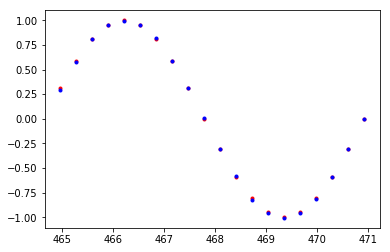

In [4]:
n_steps=75
seq_length=20
hidden=None

for step in range(n_steps):
    start=step*np.pi*2
    end=start+np.pi*2
    xtick=np.linspace(start, end, seq_length+1)
    data=np.sin(xtick)
    
    x_tensor=torch.Tensor(data[:-1])
    y_tensor=torch.Tensor(data[1:])
    
    x_tensor=x_tensor.view(1, x_tensor.size(0), 1)
    y_tensor=y_tensor.view(y_tensor.size(0), 1)
    x_tensor.requires_grad_()
    out, hidden=rnn(x_tensor, hidden)
    hidden = hidden.data
    out=out.view(-1, hidden_size)
    out=fc(out)
    
    optimizer.zero_grad()
    loss=criterion(out, y_tensor)
    loss.backward()
    optimizer.step()
    
    if (step+1)%15==0:
        print("Loss:", loss.item())
        plt.plot(xtick[:-1], y_tensor.data.numpy().flatten(), 'r.')
        plt.plot(xtick[:-1], out.data.numpy().flatten(), 'b.')
        plt.show()
    